In [97]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay


In [98]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target



In [99]:
C = 1.0 
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="sigmoid", C=C),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)


In [100]:
titles = (
    "SVC with linear kernel",
    "SVC with Sigmoid kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)



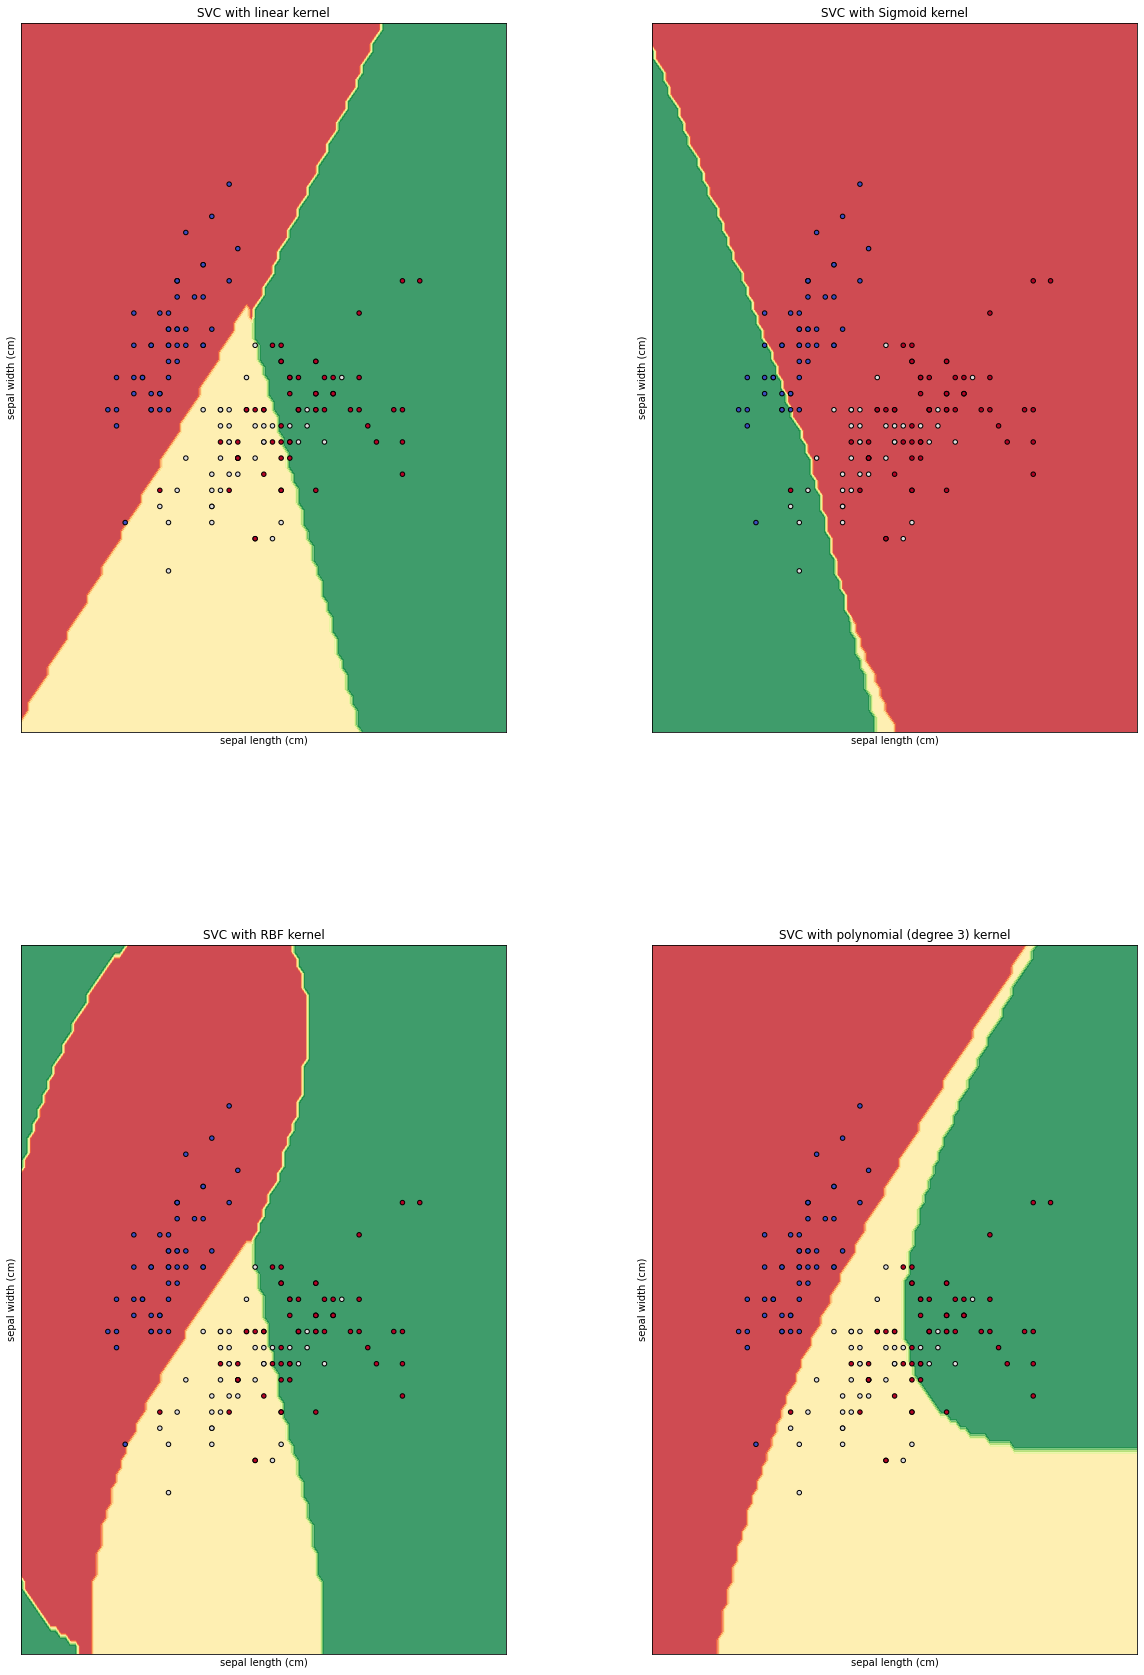

In [101]:
X0, X1 = X[:, 0], X[:, 1]
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
fig.set_figwidth(20)
fig.set_figheight(30)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.RdYlGn,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()